In [ ]:
import pandas as pd

# Nome del file Excel
nome_file = "NAV JPMorgan Global Equities Fund.xlsx"

try:
    # Leggo il file Excel
    df = pd.read_excel(nome_file)

    # Controllo che abbia almeno due colonne (Date e NAV)
    if df.shape[1] < 2:
        print("Errore: Il file Excel deve contenere almeno due colonne (Date e NAV).")
    else:
        # Rinomino le colonne per semplicità
        df.columns = ['Date', 'NAV']

        # Converto la colonna 'Date' in formato datetime
        df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Aggiunto dayfirst=True per date tipo DD/MM/YYYY

        # Imposto 'Date' come indice
        df.set_index('Date', inplace=True)

        # Calcolo variazione giornaliera del NAV
        df['Variazione_NAV'] = df['NAV'].diff()

        # Calcolo il rendimento percentuale giornaliero
        df['Rendimento_Percentuale'] = (df['Variazione_NAV'] / df['NAV'].shift(1)) * 100

        # Stampo le prime righe per controllo
        print("Prime righe del DataFrame con i rendimenti giornalieri:")
        print(df.head())

except FileNotFoundError:
    print(f"Errore: Il file '{nome_file}' non è stato trovato.")
except Exception as e:
    print(f"Si è verificato un errore durante la lettura del file o il calcolo: {e}")

Prime righe del DataFrame con i rendimenti giornalieri:
               NAV  Variazione_NAV  Rendimento_Percentuale
Date                                                      
2020-04-24  119.04             NaN                     NaN
2020-04-27  120.98            1.94                1.629704
2020-04-28  122.63            1.65                1.363862
2020-04-29  123.43            0.80                0.652369
2020-04-30  122.80           -0.63               -0.510411


In [ ]:
if 'Rendimento_Percentuale' not in df.columns:
    print("Errore: La colonna 'Rendimento_Percentuale' non è presente nel DataFrame. Assicurati di aver eseguito il Blocco 1.")
else:
    # Converto i rendimenti percentuali in forma decimale
    df['Rendimento_Decimale'] = df['Rendimento_Percentuale'] / 100

    # Raggruppo per mese e calcolo il rendimento mensile
    rendimenti_mensili = df.groupby(pd.Grouper(freq='M'))['Rendimento_Decimale'].apply(lambda x: (1 + x).prod() - 1)

    # Converto i rendimenti mensili in percentuale
    rendimenti_mensili_percentuale = rendimenti_mensili * 100

    # Creo un nuovo DataFrame per i rendimenti mensili
    df_rendimenti_mensili = pd.DataFrame({'Rendimento_Mensile_Percentuale': rendimenti_mensili_percentuale})

    print("\nPrime righe del DataFrame con i rendimenti mensili:")
    print(df_rendimenti_mensili.head())


Prime righe del DataFrame con i rendimenti mensili:
            Rendimento_Mensile_Percentuale
Date                                      
2020-04-30                        3.158602
2020-05-31                        1.701954
2020-06-30                        1.753543
2020-07-31                        0.975763
2020-08-31                        5.564214


<ipython-input-2-b100f9cd30f4>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rendimenti_mensili = df.groupby(pd.Grouper(freq='M'))['Rendimento_Decimale'].apply(lambda x: (1 + x).prod() - 1)


In [ ]:
pip install yfinance

In [ ]:
pip install --upgrade yfinance

Scaricamento dei dati di mercato relativi al benchmark (MSCI World) e agli indici geografici dei principali paesi nei quali il fondo investe.
Inoltre, vengono scaricati i tassi di cambio relativi all’Euro rispetto alle principali valute coinvolte (USD, JPY, AUD, CNY, INR, BRL) per analizzare successivamente l’effetto valutario

In [ ]:
import yfinance as yf
import pandas as pd

# Periodo e intervallo
periodo = "5y"
intervallo = "1mo"

# Ticker benchmark
benchmark_ticker = "XWD.TO"  # ETF che segue l'MSCI World

# Ticker indici per aree geografiche
indici_ticker = {
    'USA': '^GSPC',
    'Europa': 'VGK',  # ETF su Europa
    'Giappone': 'EWJ',
    'Australia': 'EWA',
    'Cina': 'MCHI',
    'India': 'INDA',
    'Brasile': 'EWZ'
}

# Ticker cambi
tassi_cambio_ticker = {
    'EURUSD': 'EURUSD=X',
    'EURJPY': 'EURJPY=X',
    'EURAUD': 'EURAUD=X',
    'EURCNY': 'EURCNY=X',
    'EURINR': 'EURINR=X',
    'EURBRL': 'EURBRL=X'
}

# Scarico benchmark
benchmark = yf.download(benchmark_ticker, period=periodo, interval=intervallo)['Close']

# Scarico indici
indici_data = yf.download(list(indici_ticker.values()), period=periodo, interval=intervallo)['Close']
indici_data.columns = indici_ticker.keys()

# Scarico cambi
cambi_data = yf.download(list(tassi_cambio_ticker.values()), period=periodo, interval=intervallo)['Close']
cambi_data.columns = tassi_cambio_ticker.keys()

print("Benchmark:")
print(benchmark.head())
print("\nIndici geografici:")
print(indici_data.head())
print("\nTassi di cambio:")
print(cambi_data.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  6 of 6 completed

Benchmark:
Ticker         XWD.TO
Date                 
2020-06-01  50.543228
2020-07-01  52.534389
2020-08-01  54.352139
2020-09-01  53.651543
2020-10-01  51.805405

Indici geografici:
                  USA     Europa   Giappone  Australia       Cina      India  \
Date                                                                           
2020-06-01  15.826509  50.303253  20.026796  26.912746  59.326393  42.837460   
2020-07-01  16.597652  50.157761  22.928316  29.700647  65.061218  44.710087   
2020-08-01  17.331249  53.564381  21.011753  31.030384  68.827866  46.638344   
2020-09-01  16.439262  54.533741  19.489771  31.486032  67.481331  44.932907   
2020-10-01  16.480944  53.767483  18.926079  31.234962  70.711197  42.737141   

                Brasile  
Date                     
2020-06-01  3100.290039  
2020-07-01  3271.120117  
2020-08-01  3500.310059  
2020-09-01  3363.000000  
2020-10-01  3269.959961  

Tassi di cambio:
              EURUSD  EURJPY  EURAUD     EURCNY      E

In [ ]:
# Ritorni mensili benchmark
benchmark_returns = benchmark.pct_change().dropna()

# Ritorni mensili indici
indici_returns = indici_data.pct_change().dropna()

# Variazione mensile del cambio (guadagni o perdite dalla parte dell' investitore in euro)
cambi_returns = cambi_data.pct_change().dropna()

Per analizzare correttamente la performance del fondo JPMorgan Global Equities Fund dal punto di vista della diversificazione internazionale, ricostruiamo un portafoglio teorico basato sulla somma pesata dei principali mercati azionari locali in cui il fondo investe.
In particolare, i rendimenti vengono calcolati come media ponderata degli indici geografici, ciascuno espresso nella propria valuta locale, utilizzando le percentuali di allocazione geografica fornite (USA, Europa, Giappone, Australia, Cina, India e Brasile).
Successivamente, verrà aggiunto l'effetto dei tassi di cambio per simulare l'impatto valutario su un investitore in Euro.
Questa metodologia consente un confronto corretto con il benchmark globale (MSCI World) e permette di isolare il contributo del rischio valutario alla performance complessiva.

In [ ]:
pesature = {
    'USA': 0.70,
    'Europa': 0.20,
    'Giappone': 0.034,
    'Australia': 0.024,
    'Cina': 0.008,
    'India': 0.008,
    'Brasile': 0.008
}

# Calcolo rendimento atteso (somma pesata delle Serie)
rendimento_atteso = sum(indici_returns[col] * peso for col, peso in pesature.items())

# Se è un DataFrame con una sola colonna, lo converto in Series
if isinstance(rendimento_atteso, pd.DataFrame):
    rendimento_atteso = rendimento_atteso.iloc[:, 0]

# Anche benchmark_returns deve essere Series
if isinstance(benchmark_returns, pd.DataFrame):
    benchmark_returns = benchmark_returns.squeeze()

# DataFrame e confronto
confronto = pd.DataFrame({
    'Fondo_Atteso_Senza_Valuta': rendimento_atteso,
    'Benchmark': benchmark_returns
}).dropna()

print(confronto.head())

            Fondo_Atteso_Senza_Valuta  Benchmark
Date                                            
2020-07-01                   0.042505   0.039395
2020-08-01                   0.044124   0.034601
2020-09-01                  -0.035281  -0.012890
2020-10-01                  -0.002439  -0.034410
2020-11-01                   0.138111   0.096857


In [ ]:
import matplotlib.pyplot as plt

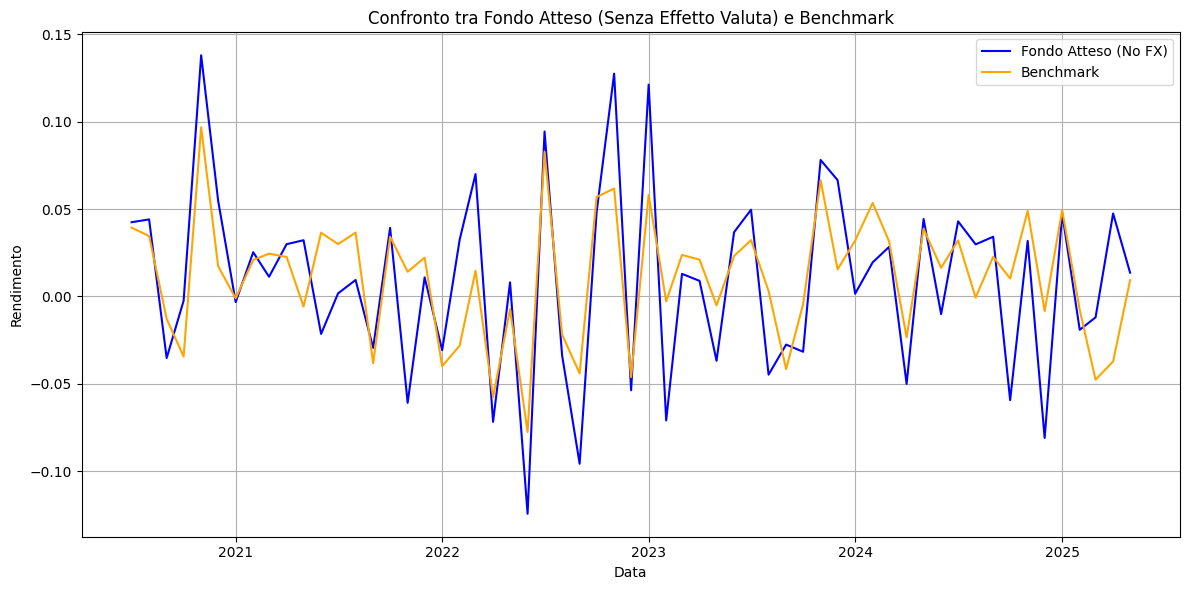

In [ ]:
# Confronto
plt.figure(figsize=(12, 6))
plt.plot(confronto.index, confronto['Fondo_Atteso_Senza_Valuta'], label='Fondo Atteso (No FX)', color='blue')
plt.plot(confronto.index, confronto['Benchmark'], label='Benchmark', color='orange')
plt.title('Confronto tra Fondo Atteso (Senza Effetto Valuta) e Benchmark')
plt.xlabel('Data')
plt.ylabel('Rendimento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Per simulare l’esperienza di un investitore europeo, aggiungiamo agli indici locali l’effetto derivante dalle variazioni dei tassi di cambio.
Questo permette di confrontare la performance del portafoglio "con valuta" rispetto a quella "senza valuta" e di isolare il contributo del rischio valutario.

In [ ]:
# Aree e tassi di cambio
area_valute = {
    'USA': 'EURUSD',
    'Giappone': 'EURJPY',
    'Australia': 'EURAUD',
    'Cina': 'EURCNY',
    'India': 'EURINR',
    'Brasile': 'EURBRL'
}

# Calcolo dell'effetto cambio pesato
effetto_cambio = sum(cambi_returns[valuta] * pesature[area] for area, valuta in area_valute.items())

# Anche qui, mi assicuro che sia una Series
if isinstance(effetto_cambio, pd.DataFrame):
    effetto_cambio = effetto_cambio.iloc[:, 0]

# Calcolo rendimento atteso con effetto cambio
rendimento_con_valuta = rendimento_atteso + effetto_cambio

# Aggiungo DataFrame confronto
confronto['Fondo_Con_Valuta'] = rendimento_con_valuta

print(confronto.head())

            Fondo_Atteso_Senza_Valuta  Benchmark  Fondo_Con_Valuta
Date                                                              
2020-07-01                   0.042505   0.039395          0.049652
2020-08-01                   0.044124   0.034601          0.032016
2020-09-01                  -0.035281  -0.012890         -0.023286
2020-10-01                  -0.002439  -0.034410          0.005048
2020-11-01                   0.138111   0.096857          0.118567


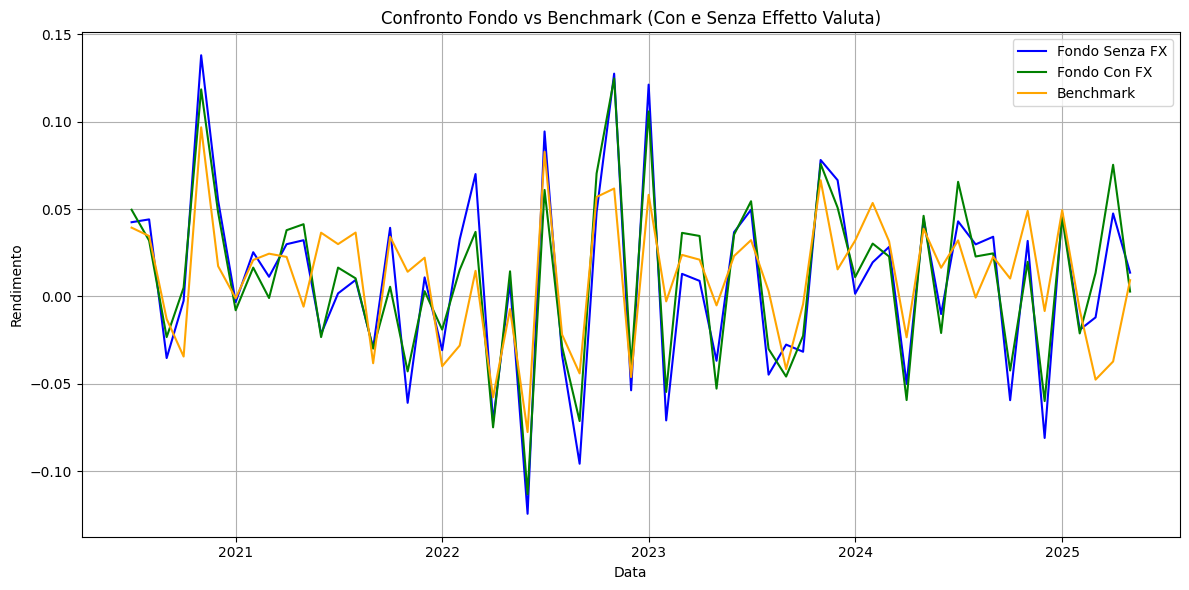

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(confronto.index, confronto['Fondo_Atteso_Senza_Valuta'], label='Fondo Senza FX', color='blue')
plt.plot(confronto.index, confronto['Fondo_Con_Valuta'], label='Fondo Con FX', color='green')
plt.plot(confronto.index, confronto['Benchmark'], label='Benchmark', color='orange')
plt.title('Confronto Fondo vs Benchmark (Con e Senza Effetto Valuta)')
plt.xlabel('Data')
plt.ylabel('Rendimento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Calcolo dell’effetto cambio come differenza tra rendimento del fondo con valuta e rendimento del fondo senza valuta.
Vengono inoltre calcolate statistiche descrittive e la media dell’effetto cambio, per valutare se l’investitore ha mediamente beneficiato o sofferto dell’esposizione valutaria.

In [ ]:
# Calcolo la differenza tra rendimento con e senza valuta
confronto['Effetto_Cambio'] = confronto['Fondo_Con_Valuta'] - confronto['Fondo_Atteso_Senza_Valuta']

# Statistiche sull'effetto cambio
print("\nStatistiche sull'effetto cambio:")
print(confronto['Effetto_Cambio'].describe())

# Valutazione media
media_cambio = confronto['Effetto_Cambio'].mean()
if media_cambio > 0:
    print(f"\nGuadagno medio derivante dal cmabio: {media_cambio:.2%}")
else:
    print(f"\nGuadagno medio derivante dal cmabio: {media_cambio:.2%}")


Statistiche sull'effetto cambio:
count    59.000000
mean      0.001121
std       0.015219
min      -0.033747
25%      -0.009383
50%      -0.000415
75%       0.011897
max       0.027870
Name: Effetto_Cambio, dtype: float64

Guadagno medio derivante dal cmabio: 0.11%


Calcolo dei rendimenti cumulativi del fondo simulato (senza valuta, con valuta) e del benchmark.
Il confronto grafico degli andamenti cumulativi permette di visualizzare l’effetto aggregato della performance nel tempo.

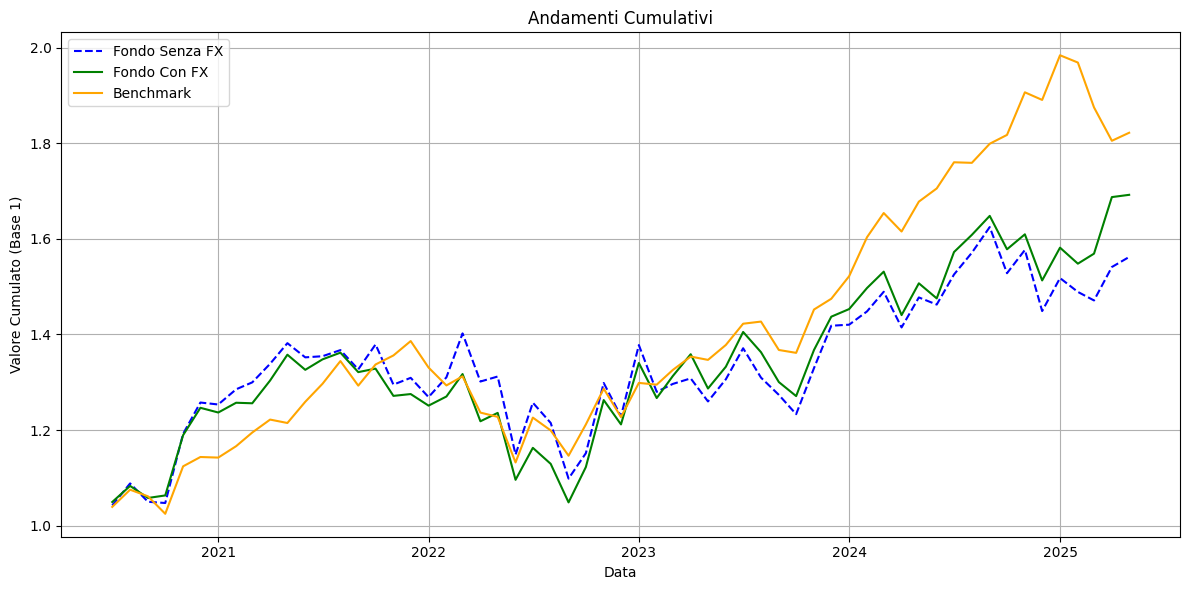

In [ ]:
# Calcolo rendimenti cumulati
confronto_cumulato = (1 + confronto).cumprod()

# Grafico
plt.figure(figsize=(12, 6))
plt.plot(confronto_cumulato.index, confronto_cumulato['Fondo_Atteso_Senza_Valuta'], label='Fondo Senza FX', linestyle='--', color='blue')
plt.plot(confronto_cumulato.index, confronto_cumulato['Fondo_Con_Valuta'], label='Fondo Con FX', color='green')
plt.plot(confronto_cumulato.index, confronto_cumulato['Benchmark'], label='Benchmark', color='orange')
plt.title('Andamenti Cumulativi')
plt.xlabel('Data')
plt.ylabel('Valore Cumulato (Base 1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Calcolo delle principali statistiche riassuntive (media, deviazione standard, Sharpe Ratio) per il fondo selezionato, quello simulato e il benchmark.

In [ ]:
# Calcolo statistiche
stats = confronto.describe()
stats.loc['Sharpe'] = confronto.mean() / confronto.std()

print(stats)

        Fondo_Atteso_Senza_Valuta  Benchmark  Fondo_Con_Valuta  Effetto_Cambio
count                   59.000000  59.000000         59.000000       59.000000
mean                     0.008984   0.010857          0.010105        0.001121
std                      0.053447   0.036151          0.048577        0.015219
min                     -0.124457  -0.077649         -0.113238       -0.033747
25%                     -0.030116  -0.008018         -0.023283       -0.009383
50%                      0.011273   0.016422          0.014387       -0.000415
75%                      0.042754   0.033223          0.039654        0.011897
max                      0.138111   0.096857          0.124810        0.027870
Sharpe                   0.168087   0.300337          0.208012        0.073651


Analisi di currency attribution: valutiamo il contributo di ciascuna valuta estera alla volatilità totale del portafoglio.
Questo permette di capire quale valuta ha maggiormente inciso sul rischio del fondo in ottica di gestione valutaria.

Contributo di ciascuna valuta alla volatilità complessiva (ordinato):
EURUSD    1.4794%
EURJPY    0.1049%
EURAUD    0.0444%
EURINR    0.0189%
EURBRL    0.0184%
EURCNY    0.0169%
dtype: object


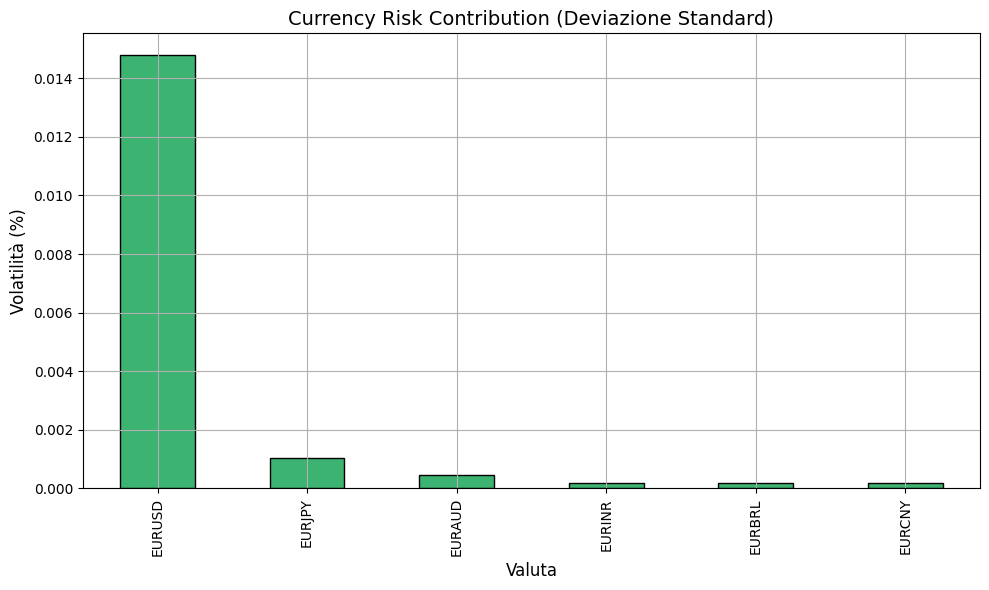

In [ ]:
# Per ogni valuta calcolo l'effetto cambio pesato
contributi_valute = {}
for area, valuta in area_valute.items():
    contributi_valute[valuta] = cambi_returns[valuta] * pesature[area]

# Creiamo un DataFrame
df_contributi_valute = pd.DataFrame(contributi_valute)

# Calcolo la volatilità (deviazione standard) di ciascun contributo valutario
volatilita_valute = df_contributi_valute.std()

volatilita_valute = volatilita_valute.sort_values(ascending=False)

print("Contributo di ciascuna valuta alla volatilità complessiva (ordinato):")
print(volatilita_valute.apply(lambda x: f"{x:.4%}"))

# Grafico a barre
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
volatilita_valute.plot(kind='bar', color='mediumseagreen', edgecolor='black')
plt.title("Currency Risk Contribution (Deviazione Standard)", fontsize=14)
plt.ylabel("Volatilità (%)", fontsize=12)
plt.xlabel("Valuta", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Correlazione calcolata per verificare l'allineamento tra fondo (con/senza valuta) e benchmark.

In [ ]:
# Correlazione
correlazione = confronto.corr()

# Tracking error
tracking_error = ((confronto['Fondo_Con_Valuta'] - confronto['Benchmark'])**2).mean()**0.5

print("\nCorrelazione:")
display(correlazione.style.format("{:.2f}").background_gradient(cmap='coolwarm'))

print(f"\nTracking Error: {tracking_error:.4%}")


Correlazione:


,Fondo_Atteso_Senza_Valuta,Benchmark,Fondo_Con_Valuta,Effetto_Cambio
Fondo_Atteso_Senza_Valuta,1.00,0.75,0.96,-0.45
Benchmark,0.75,1.00,0.72,-0.31
Fondo_Con_Valuta,0.96,0.72,1.00,-0.18
Effetto_Cambio,-0.45,-0.31,-0.18,1.00



Tracking Error: 3.3212%


In [ ]:
#STEP 1: Definizione pesi benchmark
pesi_benchmark = {
    'USA': 0.60,
    'Europa': 0.20,
    'Giappone': 0.10,
    'Altri': 0.10  # Cina + India + Brasile
}

# STEP 2: Conversione pesi fondo (già definiti come 'pesature')
pesi_fondo = {
    'USA': pesature['USA'],
    'Europa': pesature['Europa'],
    'Giappone': pesature['Giappone'],
    'Altri': pesature['Cina'] + pesature['India'] + pesature['Brasile']
}

# STEP 3: Rendimenti medi mensili in valuta locale
rend_index = {
    'USA': indici_returns['USA'].mean(),
    'Europa': indici_returns['Europa'].mean(),
    'Giappone': indici_returns['Giappone'].mean(),
    'Altri': indici_returns[['Cina', 'India', 'Brasile']].mean(axis=1).mean()
}

# STEP 4: Effetti cambio medi
effetto_cambio = {
    'USA': cambi_returns['EURUSD'].mean(),
    'Giappone': cambi_returns['EURJPY'].mean(),
    'Altri': cambi_returns[['EURCNY', 'EURINR', 'EURBRL']].mean(axis=1).mean(),
    'Europa': 0  # stessa valuta
}

# STEP 5: Rendimenti realizzati dal fondo (approssimati)
rend_fondo = {
    k: rend_index[k] + effetto_cambio[k] for k in rend_index
}

# STEP 6: Calcolo componenti di performance attribution
asset_allocation = sum((pesi_fondo[k] - pesi_benchmark[k]) * rend_index[k] for k in pesi_benchmark)
stock_selection = sum(pesi_fondo[k] * (rend_fondo[k] - rend_index[k]) for k in pesi_fondo)
currency_effect = sum((pesi_fondo[k] - pesi_benchmark[k]) * effetto_cambio[k] for k in effetto_cambio)

# Totale attribution stimata
total_attribution = asset_allocation + stock_selection + currency_effect

# Output finale
print(f"Asset Allocation Effect: {asset_allocation:.4%}")
print(f"Stock Selection Effect: {stock_selection:.4%}")
print(f"Currency Effect: {currency_effect:.4%}")
print(f"Totale Attribution Stimata: {total_attribution:.4%}")

Asset Allocation Effect: -0.0230%
Stock Selection Effect: 0.1104%
Currency Effect: -0.0168%
Totale Attribution Stimata: 0.0706%


L’analisi di performance attribution evidenzia che la stock selection è stata la principale fonte di sovraperformance del fondo, con un contributo positivo pari a +0.1104%. Al contrario, sia le scelte di allocazione geografica (-0.0230%) sia l’esposizione valutaria (-0.0168%) hanno inciso negativamente, seppur in modo contenuto. Complessivamente, il fondo ha registrato una sovraperformance stimata di +0.0706% rispetto al benchmark, attribuibile in larga parte alla capacità di selezione attiva dei titoli più che alla diversificazione geografica o valutaria.

In [ ]:
import numpy as np

Calcolo delle Frontiere

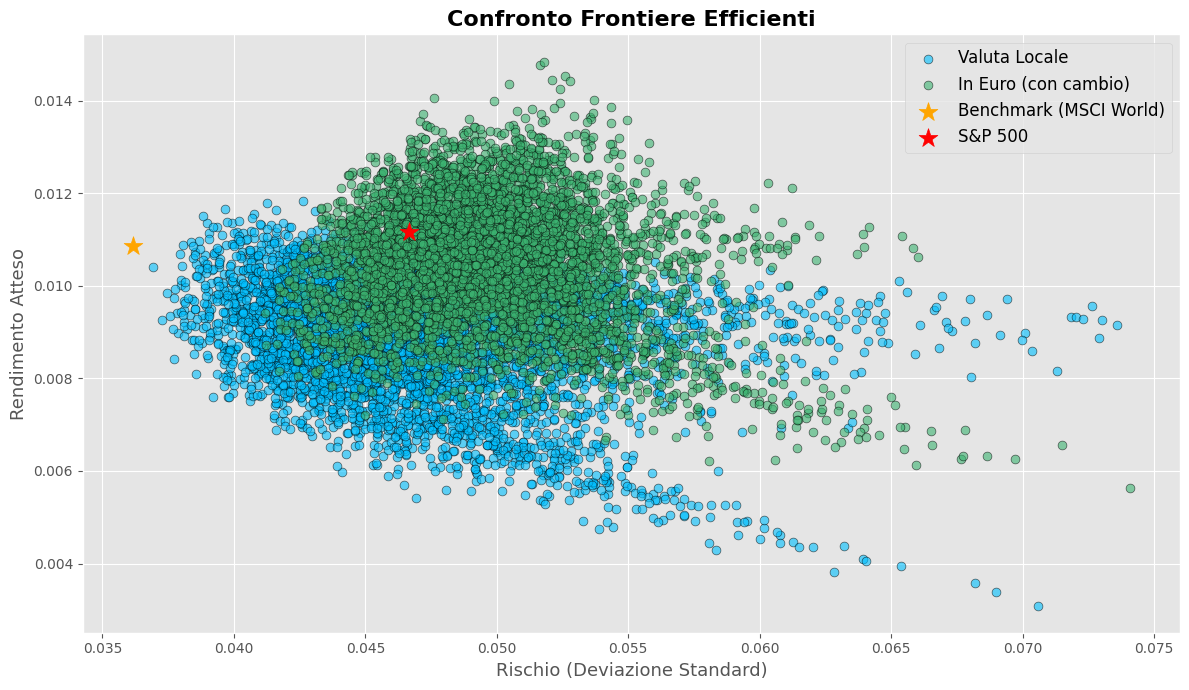

In [ ]:
rendimenti_locale = indici_returns.copy()

# Rendimenti in EUR: rendimenti locali + effetto cambio
rendimenti_euro = rendimenti_locale.copy()
for paese, ticker in area_valute.items():
    rendimenti_euro[paese] += cambi_returns[ticker]

# Funzione per generare portafogli casuali
def genera_portafogli(rendimenti, n_portafogli=5000):
    n_assets = rendimenti.shape[1]
    pesi_random = []
    rendimento_atteso = []
    volatilita = []

    for _ in range(n_portafogli):
        pesi = np.random.dirichlet(np.ones(n_assets), size=1)[0]
        rend_port = np.dot(rendimenti.mean(), pesi)
        vol_port = np.sqrt(np.dot(pesi.T, np.dot(rendimenti.cov(), pesi)))
        pesi_random.append(pesi)
        rendimento_atteso.append(rend_port)
        volatilita.append(vol_port)

    return np.array(rendimento_atteso), np.array(volatilita)

# Generazione delle frontiere
rend_locale, vol_locale = genera_portafogli(rendimenti_locale)
rend_euro, vol_euro = genera_portafogli(rendimenti_euro)

plt.style.use('ggplot')

# Calcolo dei rendimenti mensili del benchmark (MSCI World)
benchmark_ticker = "XWD.TO"
benchmark_data = yf.download(benchmark_ticker, period=periodo, interval=intervallo, progress=False)['Close']
benchmark_returns = benchmark_data.pct_change().dropna()
benchmark_mean = benchmark_returns.mean()
benchmark_vol = benchmark_returns.std()

# Calcolo per S&P 500 (^GSPC)
sp500_data = yf.download("^GSPC", period=periodo, interval=intervallo, progress=False)['Close']
sp500_returns = sp500_data.pct_change().dropna()
sp500_mean = sp500_returns.mean()
sp500_vol = sp500_returns.std()

# Grafico
plt.figure(figsize=(12, 7))

# Frontiera valuta locale
plt.scatter(vol_locale, rend_locale, c='deepskyblue', alpha=0.6, label='Valuta Locale', edgecolors='k', s=40)

# Frontiera in euro
plt.scatter(vol_euro, rend_euro, c='mediumseagreen', alpha=0.6, label='In Euro (con cambio)', edgecolors='k', s=40)

# Punto benchmark
plt.scatter(benchmark_vol, benchmark_mean, marker='*', color='orange', s=200, label='Benchmark (MSCI World)')

# Punto S&P 500
plt.scatter(sp500_vol, sp500_mean, marker='*', color='red', s=200, label='S&P 500')

# Titoli e assi
plt.title("Confronto Frontiere Efficienti", fontsize=16, fontweight='bold')
plt.xlabel("Rischio (Deviazione Standard)", fontsize=13)
plt.ylabel("Rendimento Atteso", fontsize=13)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()